In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

import joblib

In [ ]:
excel_file = "SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx"
years = range(2010,2017)

In [65]:
df_1 = pd.read_excel(excel_file , sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()
df_2 = pd.read_excel(excel_file , sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()
all_data = []

In [ ]:
for year in years:
    try :
        df_com = pd.read_excel(excel_file , sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file , sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com. rename(columns={
            'Commodity Code':'Code',
            'Commodity Name':'Name'
        },inplace=True)

        df_ind.rename(columns={
        'Industry Code':'Code',
        'Industry Name':'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))


    except Exception as e:
        print(f"Error processing year {year}: {e}")



In [ ]:
all_data[2]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.438,0.068,0.506,NaN,4,3,1,4,1,Commodity,2012
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2012
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2012
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2012
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.693,0.076,0.769,NaN,4,3,1,4,1,Commodity,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.007,0.000,0.007,NaN,4,3,1,5,1,Industry,2012
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2012


Let's explore the data further. What would you like to do next? We could:
- Analyze the distribution of emission factors.
- Examine the data quality scores.
- Compare emission factors across different industries or commodities.
- Visualize the data in various ways.

In [ ]:
len(all_data)

7

In [ ]:
df = pd.concat(all_data, ignore_index=True)
df.head(2)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010


In [ ]:
len(df)

22092

In [ ]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [ ]:
df.drop(columns='Unnamed: 7', inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


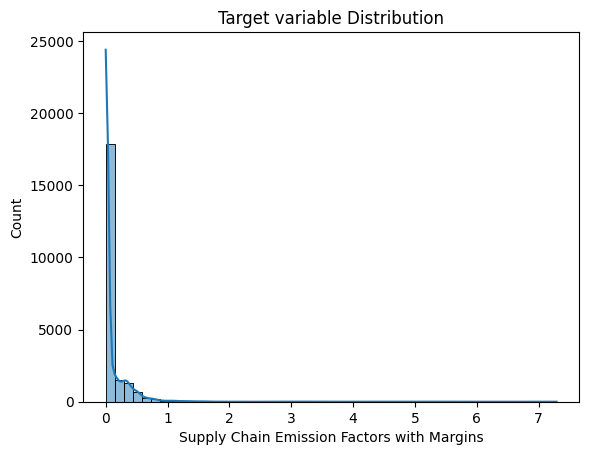

In [ ]:
sns.histplot(df['Supply Chain Emission Factors with Margins'],bins=50 , kde=True)
plt.title('Target variable Distribution')
plt.show()

In [ ]:
print(df['Substance'].value_counts())
print(df['Unit'].value_counts())
print(df['Source'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64
Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64
Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [ ]:
df['Substance'] = df['Substance'].astype(str).str.strip().str.lower()
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other ghgs'],
      dtype=object)

In [ ]:
substance_mapping = {
    'carbon dioxide': 0,
    'methane': 1,
    'nitrous oxide': 2,
    'other ghgs': 3
}
df['Substance'] = df['Substance'].map(substance_mapping)

In [ ]:
df['Substance'].unique()
df['Unit'] = df['Unit'].astype(str).str.strip().str.lower()
df['Unit'].unique()

array(['kg/2018 usd, purchaser price',
       'kg co2e/2018 usd, purchaser price'], dtype=object)

In [ ]:
unit_mapping = {
    'kg/2018 usd, purchaser price': 0,
    'kg co2e/2018 usd, purchaser price': 1
}
df['Unit'] = df['Unit'].map(unit_mapping)

In [ ]:
print(df['Unit'].unique())

[0 1]


In [ ]:
df['Source'] = df['Source'].astype(str).str.strip().str.lower()
df['Source'].unique()

array(['commodity', 'industry'], dtype=object)

In [ ]:
source_mapping = {
    'industry': 0,
    'commodity': 1
}

df['Source'] = df['Source'].map(source_mapping)

In [ ]:
df['Source'].unique()

array([1, 0])

In [ ]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [ ]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [ ]:
len(df.Name.unique())

713

In [ ]:
top_10 = df[['Name','Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)
top_10 = top_10.reset_index()
top_10

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


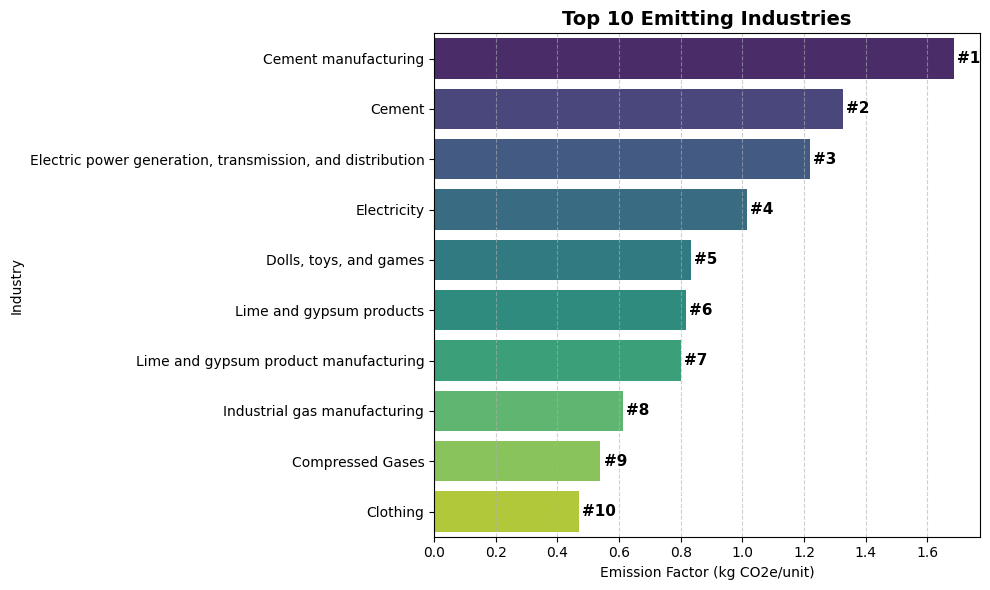

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_10,
    hue='Name',
    palette='viridis'
)

# Add ranking labels (1, 2, 3..) next to bars
for i, (value, name) in enumerate(zip(top_10['Supply Chain Emission Factors with Margins'], top_10.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [ ]:
df.drop(columns=['Name','Code','Year'], inplace=True)

In [ ]:
print("Shape of the DataFrame :", df.shape)

Shape of the DataFrame : (22092, 11)


In [ ]:
print("Columns in the DataFrame:")
df.columns

Columns in the DataFrame:


Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
Y = df['Supply Chain Emission Factors with Margins']

In [ ]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,4,3,1,4,1,1
1,1,0,0.001,0.001,4,3,1,1,1,1
2,2,0,0.002,0.000,4,3,1,4,1,1
3,3,1,0.002,0.000,3,3,1,3,1,1
4,0,0,0.659,0.081,4,3,1,4,1,1


In [ ]:
Y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


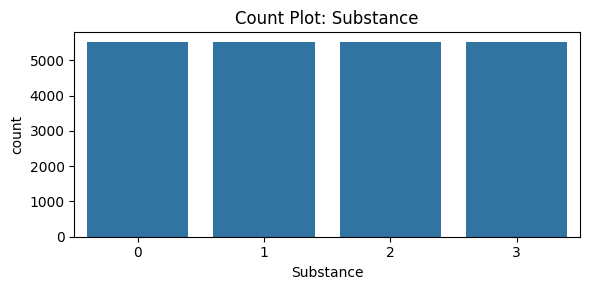

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

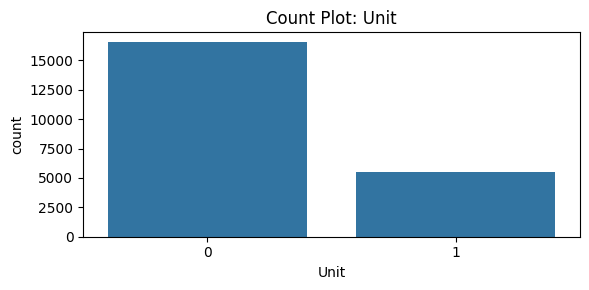

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

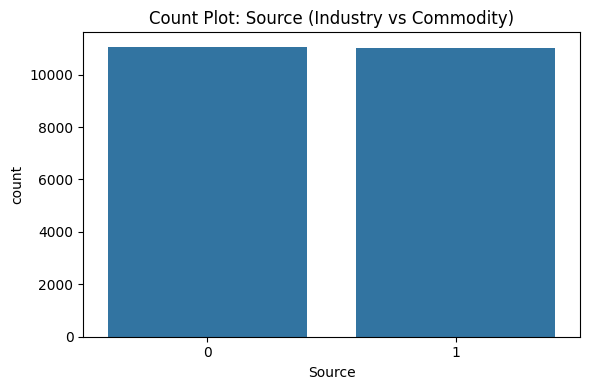

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [ ]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,-4.275104e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,1.439119e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,-2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,-6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-1.908036e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,-2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

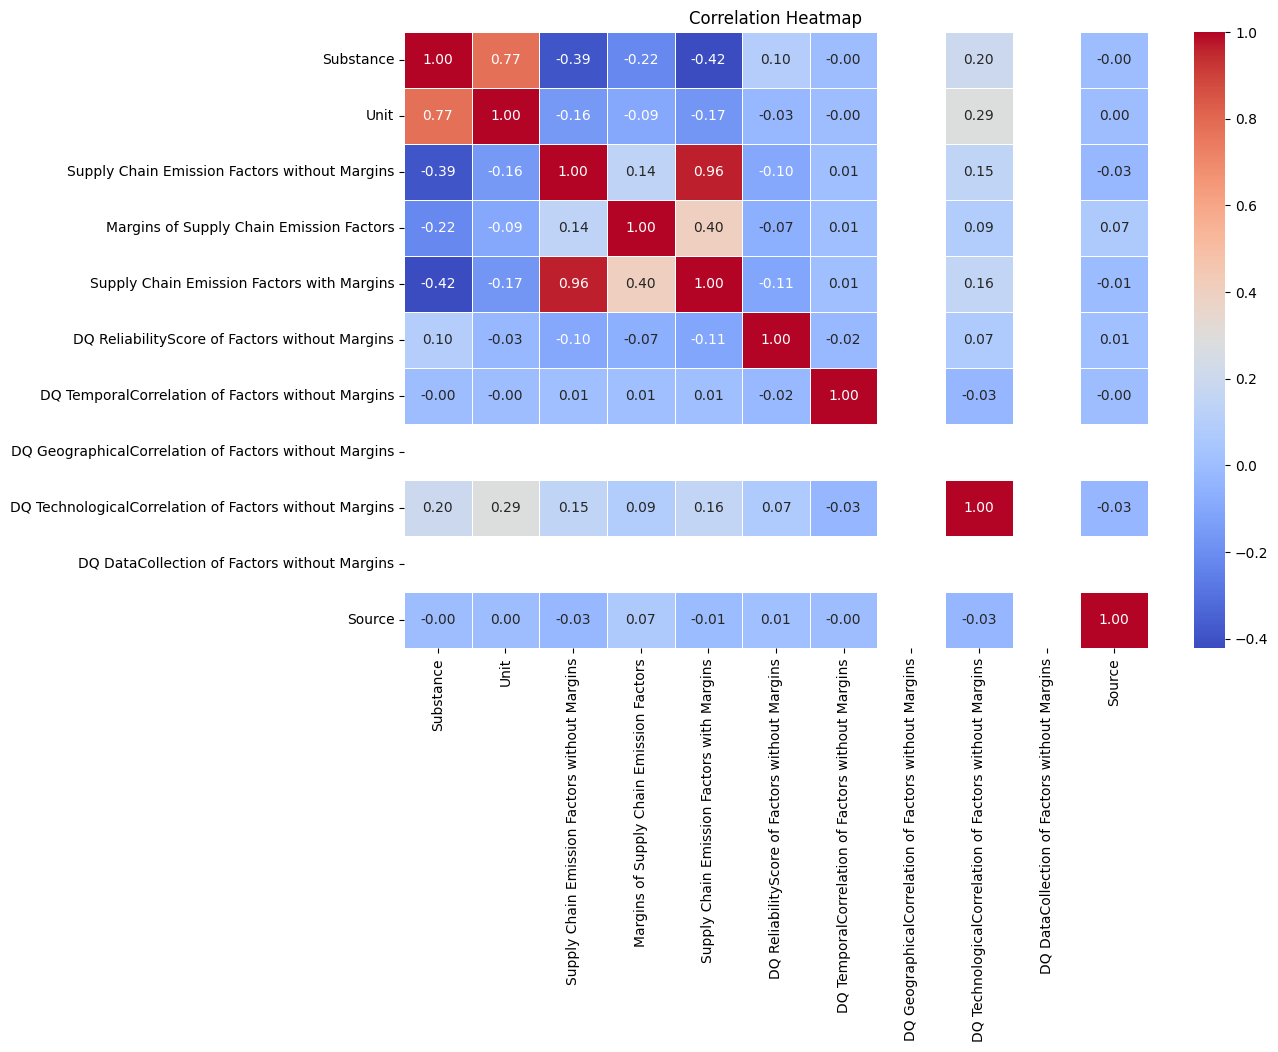

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.499366,0.500011,0.0,0.00,0.000,1.000,1.000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[0].min(),X_scaled[0].max()

(np.float64(-1.3416407864998738), np.float64(1.3849614361966767))

In [ ]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

In [ ]:
X.shape

(22092, 10)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(4419, 10)

In [ ]:
RF_model = RandomForestRegressor(random_state=42)

In [ ]:
RF_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
RF_y_pred = RF_model.predict(X_test)

In [ ]:
RF_y_pred[:20]

array([2.92960000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94060000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15870000e-01, 9.00000000e-03, 0.00000000e+00])

In [ ]:
RF_mse = mean_squared_error(Y_test, RF_y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(Y_test, RF_y_pred)

print(f"Random Forest Model - MSE: {RF_mse:.2f}")
print(f"Random Forest Model - RMSE: {RF_rmse:.2f}")
print(f"Random Forest Model - R^2: {RF_r2:.2f}")

Random Forest Model - MSE: 0.00
Random Forest Model - RMSE: 0.01
Random Forest Model - R^2: 1.00


In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(X_train, Y_train)

LR_y_pred = LR_model.predict(X_test)

LR_mse = mean_squared_error(Y_test, LR_y_pred)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(Y_test, LR_y_pred)

print(f"Linear Regression Model - MSE: {LR_mse:.2f}")
print(f"Linear Regression Model - RMSE: {LR_rmse:.2f}")
print(f"Linear Regression Model - R^2: {LR_r2:.2f}")

Linear Regression Model - MSE: 0.00
Linear Regression Model - RMSE: 0.00
Linear Regression Model - R^2: 1.00


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print("Best parameters : ", grid_search.best_params_)

Best parameters :  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
Y_pred_best = best_model.predict(X_test)

HP_mse = mean_squared_error(Y_test, Y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(Y_test, Y_pred_best)

print(f"Hyperparameter Tuned Model - MSE: {HP_mse:.2f}")
print(f"Hyperparameter Tuned Model - RMSE: {HP_rmse:.2f}")
print(f"Hyperparameter Tuned Model - R^2: {HP_r2:.2f}")

Hyperparameter Tuned Model - MSE: 0.00
Hyperparameter Tuned Model - RMSE: 0.01
Hyperparameter Tuned Model - R^2: 1.00


In [ ]:
results = {
    'Model' : ['Random Forest', 'Linear Regression', 'Hyperparameter Tuned Random Forest'],
    'MSE' : [RF_mse, LR_mse, HP_mse],
    'RMSE' : [RF_rmse, LR_rmse, HP_rmse],
    'R^2' : [RF_r2, LR_r2, HP_r2]
}

comparison_df = pd.DataFrame(results)
print( comparison_df )

                                Model           MSE      RMSE       R^2
0                       Random Forest  3.725021e-05  0.006103  0.999337
1                   Linear Regression  7.881378e-08  0.000281  0.999999
2  Hyperparameter Tuned Random Forest  3.725021e-05  0.006103  0.999337


In [ ]:
!mkdir models

In [67]:
joblib.dump(best_model, 'models/LR_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [68]:
import pickle